In [82]:
import json
import pandas as pd
import matplotlib.pyplot as plt

JSON_PATH = '/home/luiz/repos/tcc_experiments_az_ml/results/feature_jsons'

GINI_SCORES_PATH = f"{JSON_PATH}/gini_scores.json"
INFOGAIN_SCORES_PATH = f"{JSON_PATH}/infogain_scores.json"
PEARSON_SCORES_PATH = f"{JSON_PATH}/pearson_scores.json"
SPEARMAN_SCORES_PATH = f"{JSON_PATH}/spearman_scores.json"

In [83]:
def sort(data, score_key:str) -> list:
    return sorted(data['feature_scores'], key=lambda x: x[score_key], reverse=True)

def print_head(sorted:list, method:str):
    print(f"METHOD : {method}")
    first_elements = sorted[:10]
    for element in first_elements:
        print('\n',element['feature'])

In [84]:
def load(path:str):
    with open(path, 'r') as file:
        return json.load(file)

In [85]:
gini_scores = any
infogain_scores = any
pearson_scores = any
spearman_scores = any

GINI_KEY = 'gini'
INFOGAIN_KEY = 'infogain'
SPEARMAN_KEY = 'spearman'
PEARSON_KEY = 'pearson'

gini_scores = load(GINI_SCORES_PATH)
infogain_scores = load(INFOGAIN_SCORES_PATH)
pearson_scores = load(PEARSON_SCORES_PATH)
spearman_scores = load(SPEARMAN_SCORES_PATH)

gini_sorted = sort(data=gini_scores, score_key=GINI_KEY)
print_head(gini_sorted, GINI_KEY)

infogain_sorted = sort(data=infogain_scores, score_key=INFOGAIN_KEY)
print_head(infogain_sorted, INFOGAIN_KEY)

pearson_sorted = sort(data=pearson_scores, score_key=PEARSON_KEY)
print_head(pearson_sorted, PEARSON_KEY)

spearman_sorted = sort(data=spearman_scores, score_key=SPEARMAN_KEY)
print_head(spearman_sorted, SPEARMAN_KEY)



METHOD : gini

 reference_type_ENUM_encoded

 references_count

 vendor_ENUM_encoded

 type_ENUM_vt_ec

 versions

 cvss_c_ENUM_partial

 products

 cvss_exploitability_score

 type_ENUM_vt_dirt

 cvss_score
METHOD : infogain

 reference_type_ENUM_encoded

 cvss_impact_score

 cvss_score

 cvss_exploitability_score

 references_count

 vendor_ENUM_encoded

 type_ENUM_vt_ec

 versions

 cvss_version_ENUM_2_0

 cvss_has_exploitability_score
METHOD : pearson

 type_ENUM_vt_ec

 cvss_exploitability_score

 cvss_a_ENUM_partial

 cvss_i_ENUM_partial

 cvss_version_ENUM_2_0

 cvss_c_ENUM_partial

 type_ENUM_absent

 description_ENUM_joomla

 cvss_s_ENUM_absent

 cvss_ui_ENUM_absent
METHOD : spearman

 type_ENUM_vt_ec

 cvss_exploitability_score

 cvss_a_ENUM_partial

 cvss_i_ENUM_partial

 cvss_version_ENUM_2_0

 vendor_ENUM_encoded

 references_count

 cvss_c_ENUM_partial

 cvss_impact_score

 type_ENUM_absent


In [86]:
def load_df(data, method):
    df = pd.DataFrame(data['feature_scores'])
    df['method'] = method
    return df


In [87]:
gini_df = load_df(gini_scores, 'gini')
infogain_df = load_df(infogain_scores, 'infogain')
pearson_df = load_df(pearson_scores, 'pearson')
spearman_df = load_df(spearman_scores, 'spearman')

In [88]:
gini_df = gini_df.rename(columns={'gini': 'score'})
infogain_df = infogain_df.rename(columns={'infogain': 'score'})
pearson_df = pearson_df.rename(columns={'pearson': 'score'})
spearman_df = spearman_df.rename(columns={'spearman': 'score'})

In [89]:
# Combinar todos os DataFrames
all_scores_df = pd.concat([gini_df, infogain_df, pearson_df, spearman_df])

# Filtrar as top 10 características por método
top_features_df = all_scores_df.groupby('method').apply(lambda x: x.nlargest(10, 'score')).reset_index(drop=True)


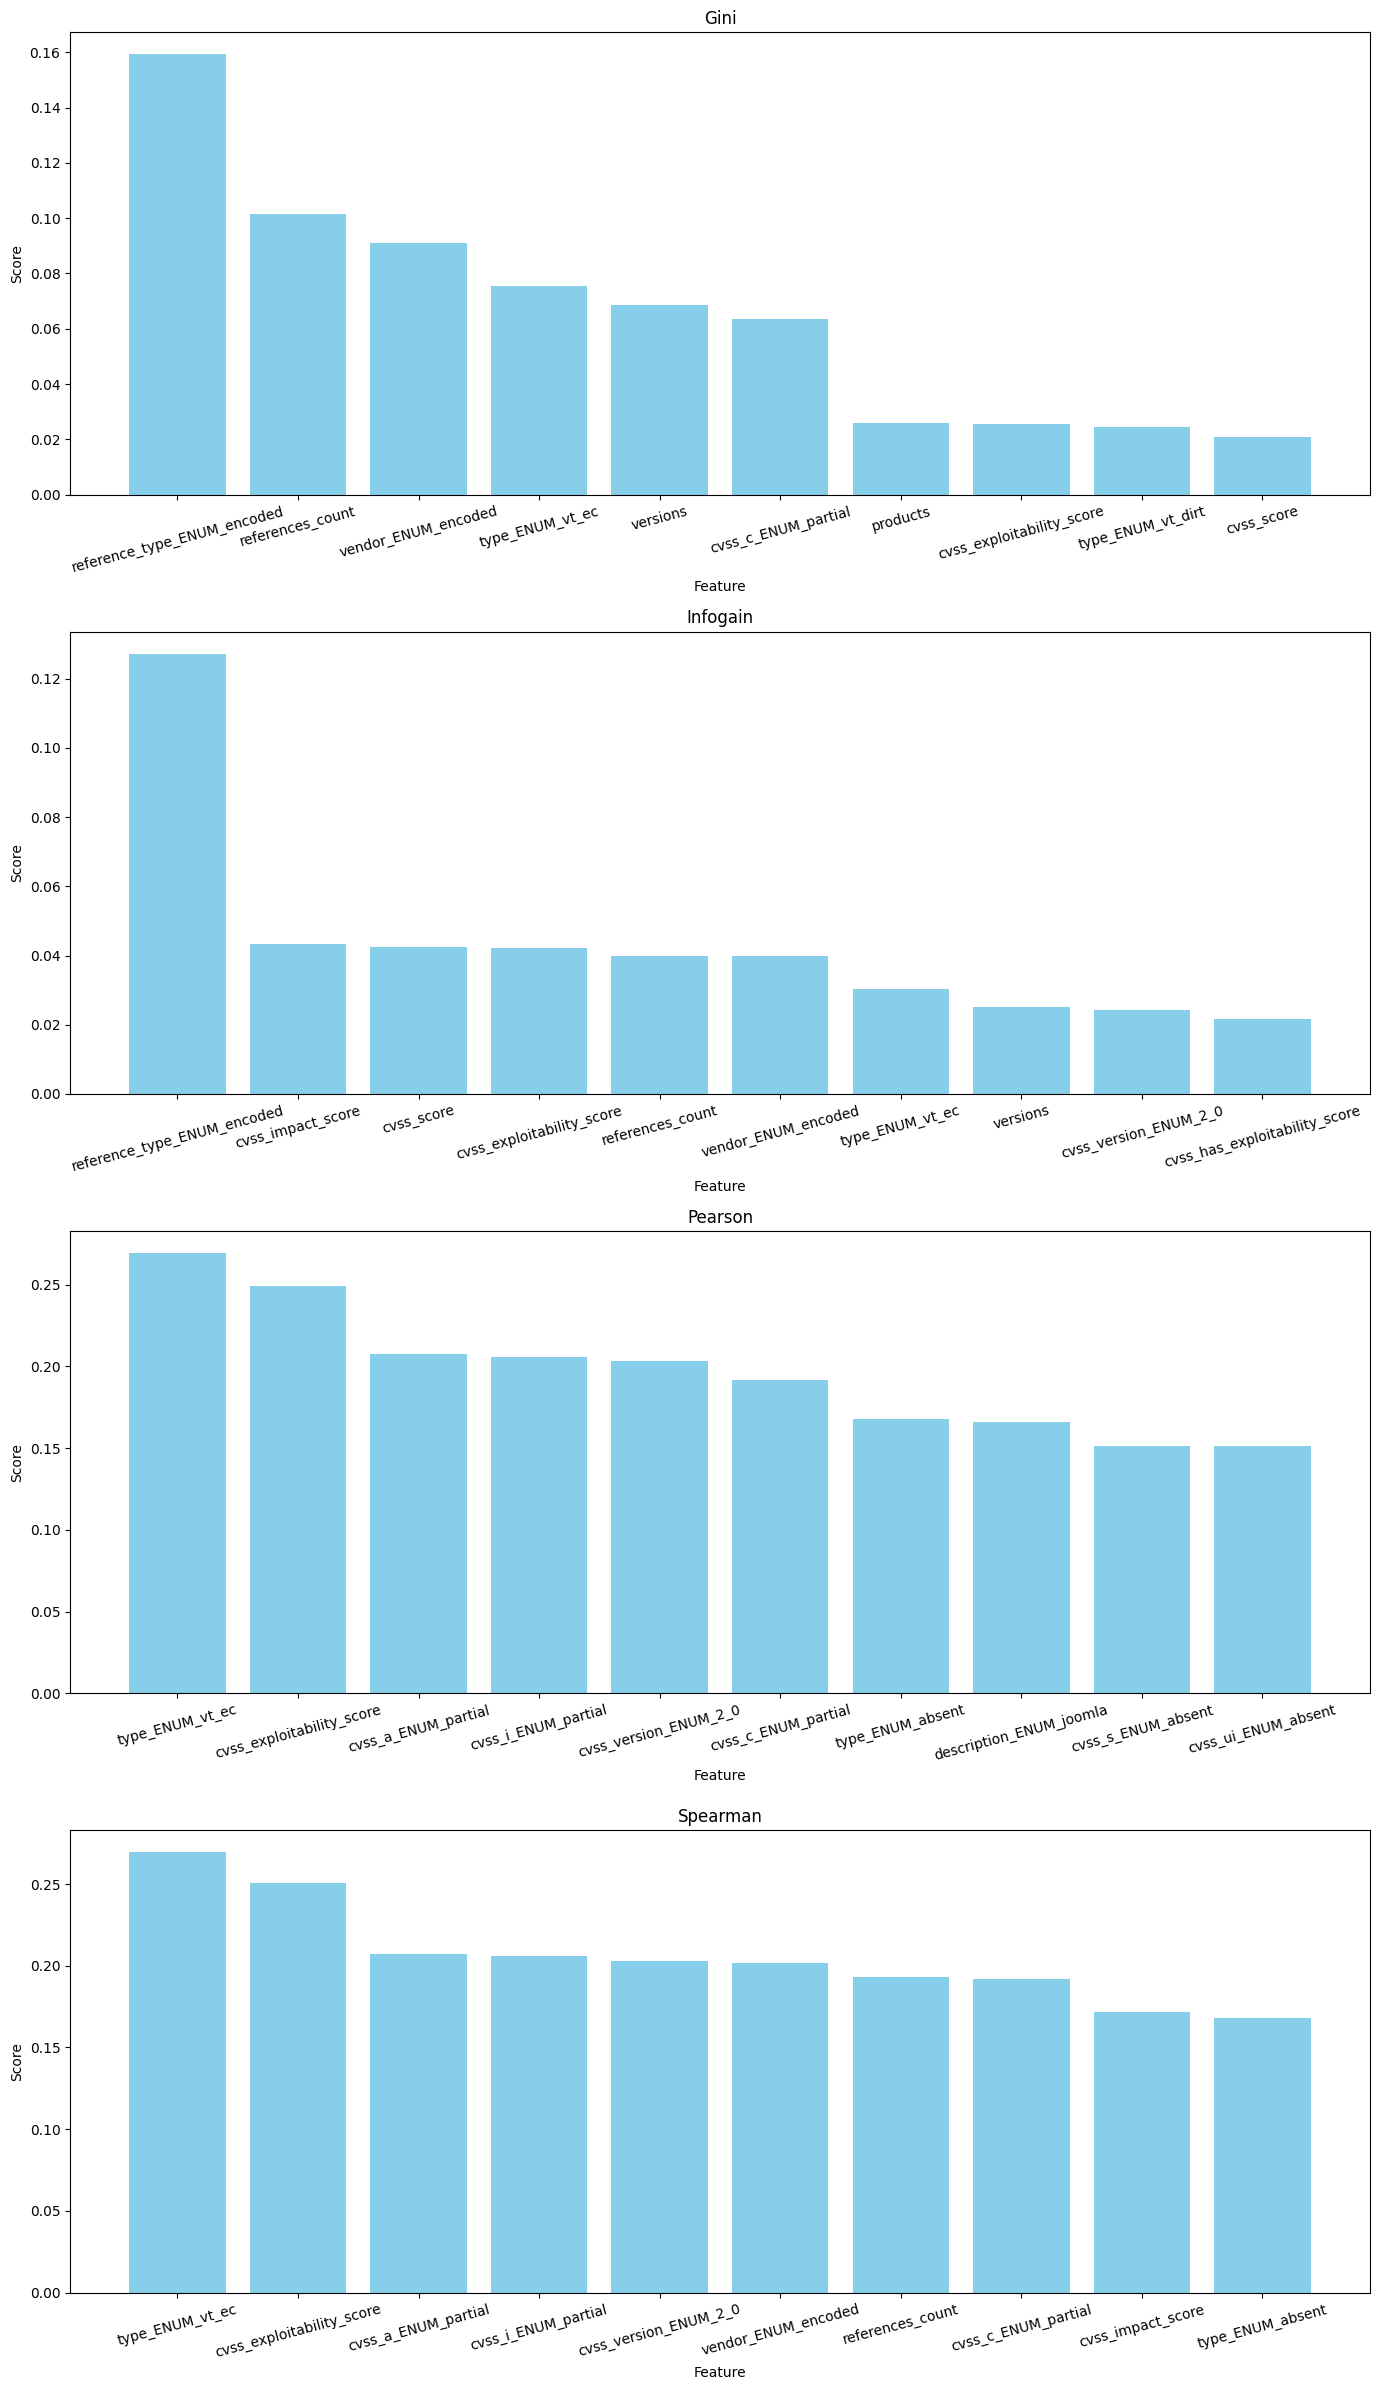

In [90]:
# Função adaptada para plotar gráficos de barras verticais sem o uso de tight_layout em cada subplot
def plot_top_features(df, methods):
    fig, axs = plt.subplots(4, 1, figsize=(14, 24))

    for i, method in enumerate(methods):
        subset = df[df['method'] == method]
        axs[i].bar(subset['feature'], subset['score'], color='skyblue')
        axs[i].set_xlabel('Feature')
        axs[i].set_ylabel('Score')
        axs[i].set_title(f'{method.capitalize()}')
        axs[i].tick_params(axis='x', rotation=15)

    plt.tight_layout()
    plt.show()

# Métodos de seleção de características
methods = ['gini', 'infogain', 'pearson', 'spearman']

# Plotar gráficos de barras para cada método na mesma imagem
plot_top_features(top_features_df, methods)
